# Visualization Examples
This notebook demonstrates a few visualization techniques just to show what is possible.  It starts with an overview of a complex visualization which uses the oft used, diamonds dataset.  Here it shows how subplots can be used to show different kinds of charts all in one go.

Following this the `mtcars` dataset is used to demonstrate how to visualize up to seven different dimensions in a single unified visual.  Each step adding one more piece of information to the overall picture.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
from plotnine.data import mtcars
from plotnine.data import diamonds as d
from plotnine.data import msleep
from pandas.api.types import CategoricalDtype

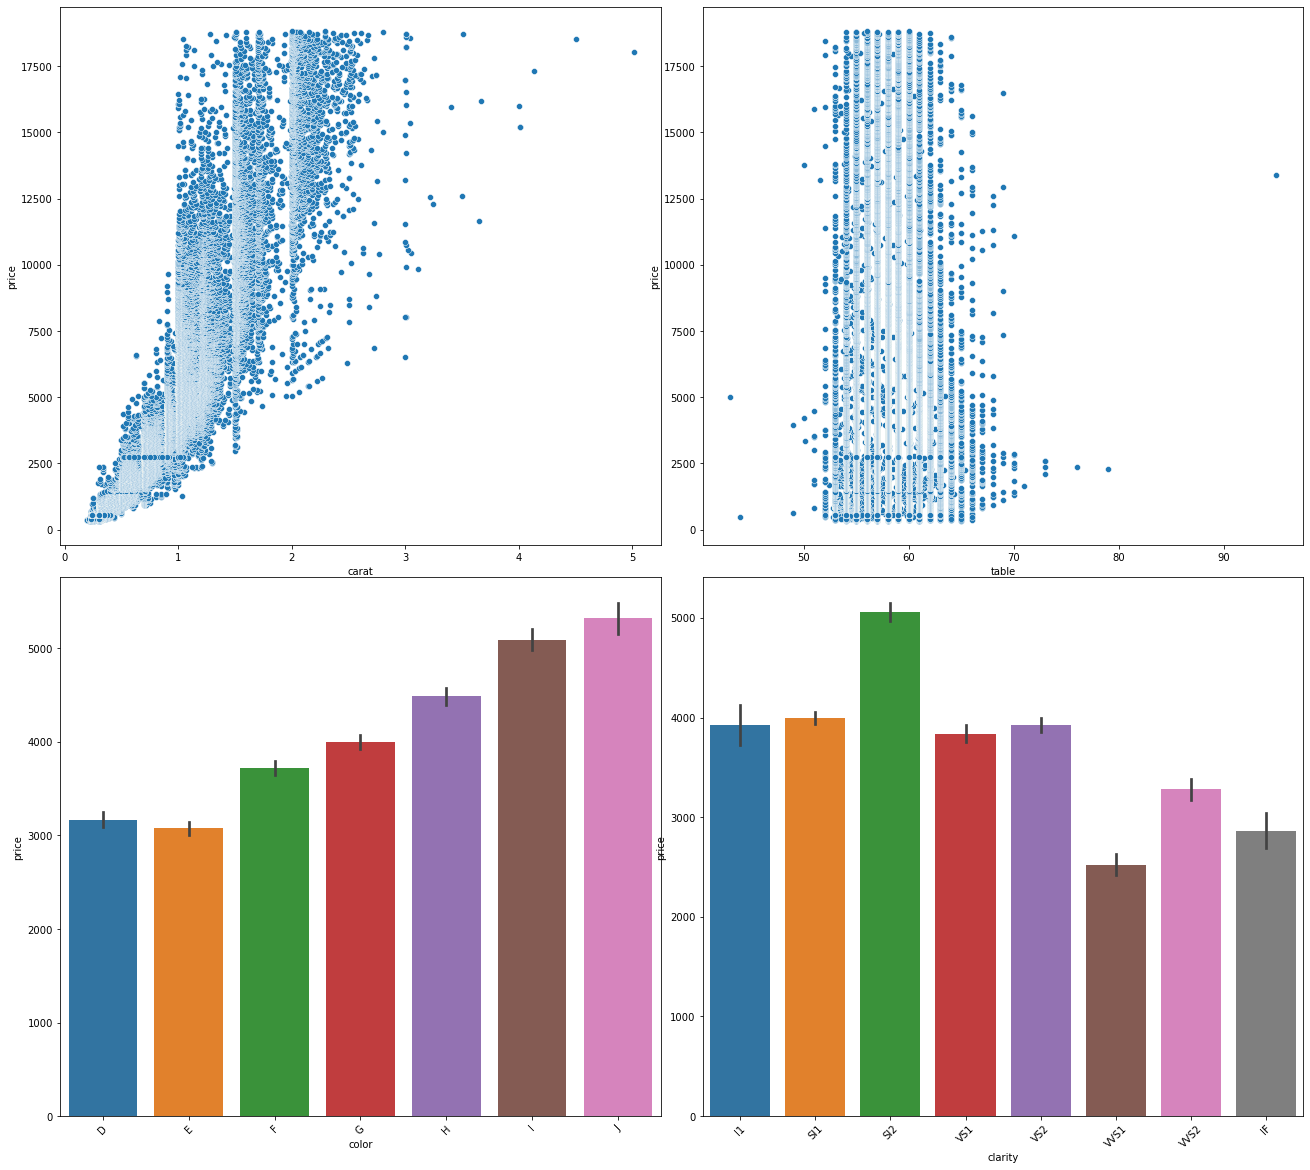

In [15]:

f, axarr= plt.subplots(2,2, sharex=False, sharey=False, figsize=(18, 16))
f.tight_layout()
clarity_cat = CategoricalDtype(categories=['I1','SI1','SI2','VS1','VS2','VVS1', 'VVS2','IF'], ordered=True)
d['clarity'] = d.clarity.astype(clarity_cat)
sns.scatterplot(x=d.carat,y=d.price, ax=axarr[0,0])
sns.scatterplot(x=d.table,y=d.price, ax=axarr[0,1])
sns.barplot(x=d.color,y=d.price, ax=axarr[1,0])
sns.barplot(x=d.clarity, y=d.price, ax=axarr[1,1])
plt.setp(axarr[1,0].xaxis.get_majorticklabels(), rotation=45)
plt.setp(axarr[1,1].xaxis.get_majorticklabels(), rotation=45);

## mtcars
This next set of visuals shows how we can disect a dataset along 1 to 7 dimensions.

In [8]:
df = mtcars
df['cyl'] = df.cyl.astype('category')
df['am'] = df.am.astype('category')
df['gear'] = df.gear.astype('category')
df['trans'] = df.am.apply(lambda x: 'auto' if x else 'man')
df['engine'] = df.vs.apply(lambda x: 'V-shaped' if x else 'straight')


It is often helpful to view a single dimension of data to understand it's distribution.  We can use multiple different kinds of visuals here (histogram, pie-chart and kernel density plot come to mind).  But I'm not a huge fan of pie charts as they often are difficult to read, so a histogram works well.  We could also use a kernel density plot, which removes the issue with choosing a bin size.

/opt/conda/lib/python3.9/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 6'. Pick better value with 'binwidth'.


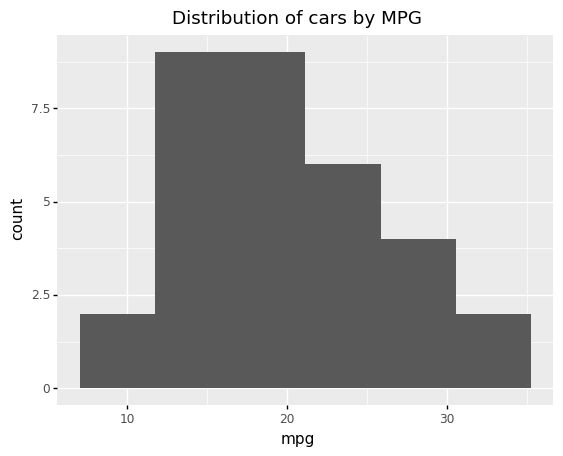

<ggplot: (8736205149302)>

In [19]:
(ggplot(mtcars, aes(x='mpg', y='stat(count)')) + geom_histogram()
+ ggtitle('Distribution of cars by MPG'))

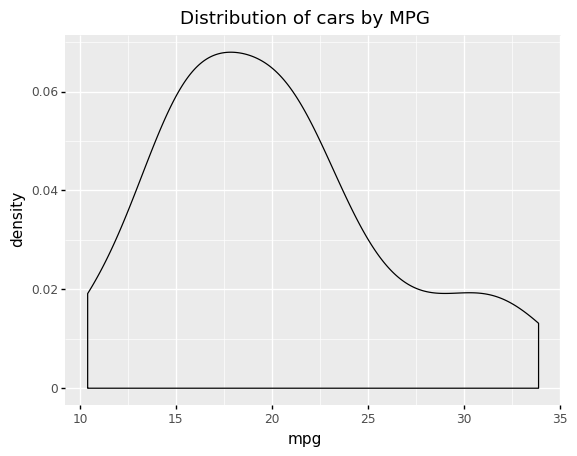

<ggplot: (8736202953816)>

In [25]:
(ggplot(df, aes('mpg'))
+ geom_density()
+ ggtitle('Distribution of cars by MPG'))

When we want to consider the data in two dimensions, one way to go about this is to consider two axises.  In this way we see the relationship between the two variables.

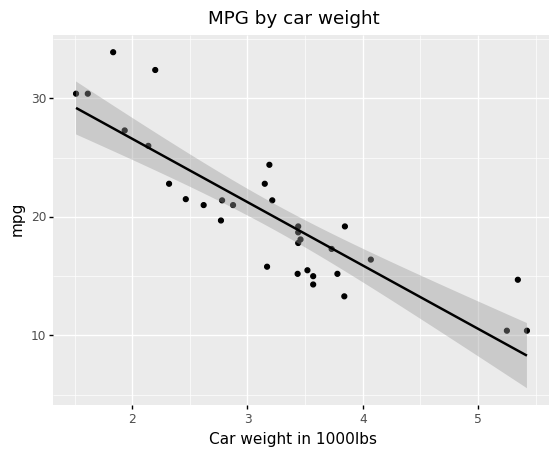

<ggplot: (8736204943038)>

In [12]:
(ggplot(df, aes(x='wt', y='mpg'))
 +geom_point()
 + xlab("Car weight in 1000lbs")
 +geom_smooth(method='lm')
+ ggtitle('MPG by car weight'))

Adding a third dimension (in this case `gear`) to our scatterplot allows us to see even more insights in our data.  For instance, once we color the chart, we can see that cars in our dataset with 3 gears tend to weigh more and have a lower MPG.  While cars with 4 gears seem to be lighter and more efficient.

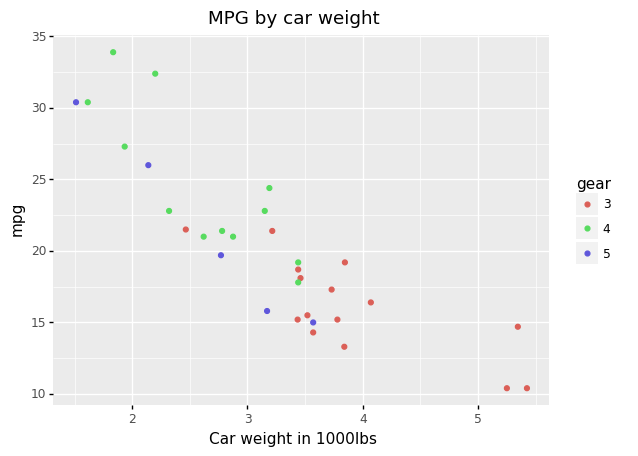

<ggplot: (8736204883131)>

In [13]:
(ggplot(df, aes(x='wt', y='mpg', color='gear'))
 +geom_point()
 + xlab("Car weight in 1000lbs")
+ ggtitle('MPG by car weight'))

Size allows us to add a fourth dimension to our data.  In this case, we've decided to look at the number of cylinders for the size.  While we could certainly have used size for any of the other dimensions that we considered previously, it seems to make sense that we would use size here as it's clear that a 4-cylinder engine is usually smaller than a 6 or 8-cylinder.  Using one of the aesthetics might make sense, but size seems to fit best here.

/opt/conda/lib/python3.9/site-packages/plotnine/scales/scale_size.py:48: PlotnineWarning: Using size for a discrete variable is not advised.


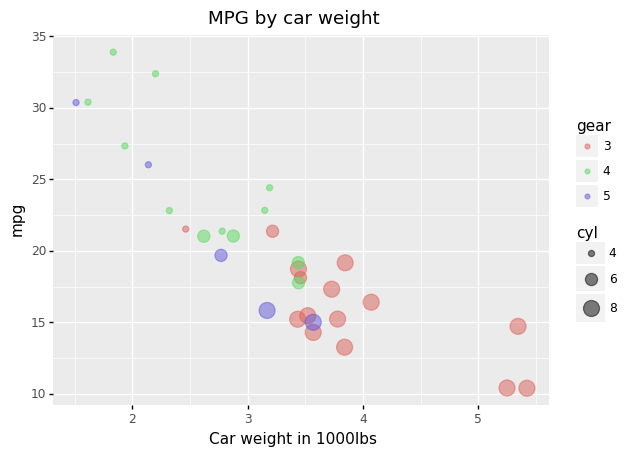

<ggplot: (8736204912415)>

In [14]:
(ggplot(df, aes(x='wt', y='mpg', color='gear', size='cyl'))
 +geom_jitter(alpha=0.5) 
 + labs(x="Car weight in 1000lbs", title='MPG by car weight'))

So far, we have developed a single chart with 4 unique pieces of information all at a glance and we haven't really cluttered our visual a whole lot.  Let's see how much further we can go before the visual gets too busy.  (The key is to select the right aesthetic for the right dimension in order that it makes sense).

Our next dimension is the type of engine.  Our dataset has V shaped engines and straight.  This is best represented by changing the `shape` of our markers.  You can see below that most of our 8-cylinder engines tend to be three speed and have a 

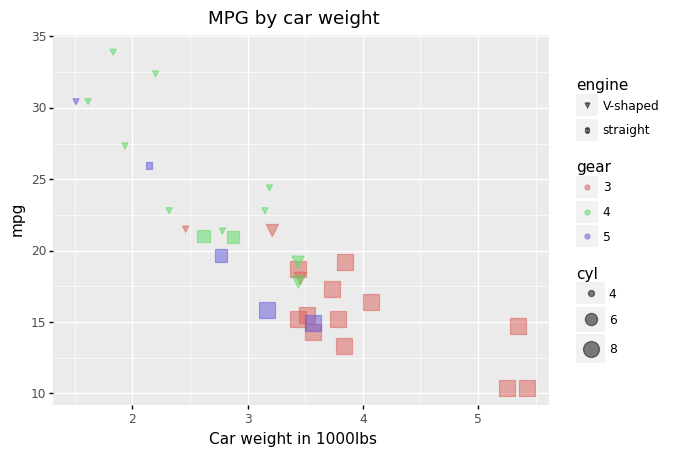

<ggplot: (8736204991229)>

In [37]:
# This line supresses a warning about using an aestethic in an unexpected way,
#   it can be removed to see the warning.
%%capture --no-display

(ggplot(df, aes(x='wt', y='mpg', color='gear', size='cyl', shape='engine'))
+ scale_shape_manual(["v","s"])
+ geom_jitter(alpha=0.5) 
+ labs(x="Car weight in 1000lbs", title='MPG by car weight'))

We can see now up to 5 dimensions, and here is where the interesting steps come in.  Let's say we want to see all the previous information, but we'd like to focus on the particular type of transmission.  We could adjust the shapes to account for the 4 different types (V-shaped + manual, V-shaped + automatic, straight manual, straight automatic) or we could use color with this combined factor.  But instead we can simply split our visual into two visuals using facets.

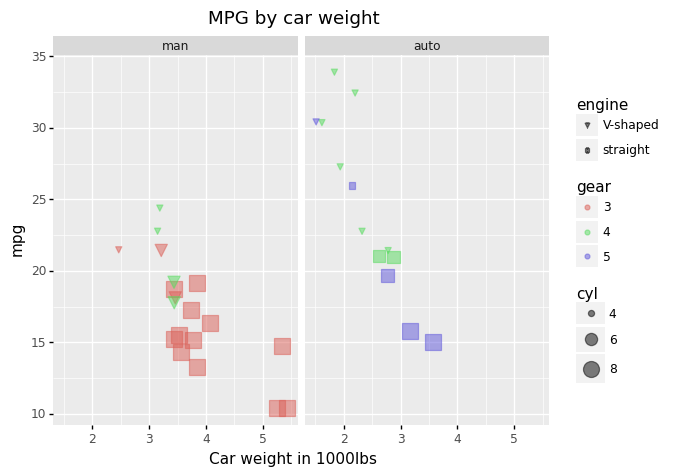

<ggplot: (8736202641818)>

In [39]:
%%capture --no-display

(ggplot(df, aes(x='wt', y='mpg', color='gear', size='cyl', shape='engine'))
 +geom_jitter(alpha=0.5) 
 + scale_shape_manual(["v","s"])
 +facet_grid('~trans')
  + labs(x="Car weight in 1000lbs", title='MPG by car weight'))

/opt/conda/lib/python3.9/site-packages/plotnine/scales/scale_size.py:48: PlotnineWarning: Using size for a discrete variable is not advised.


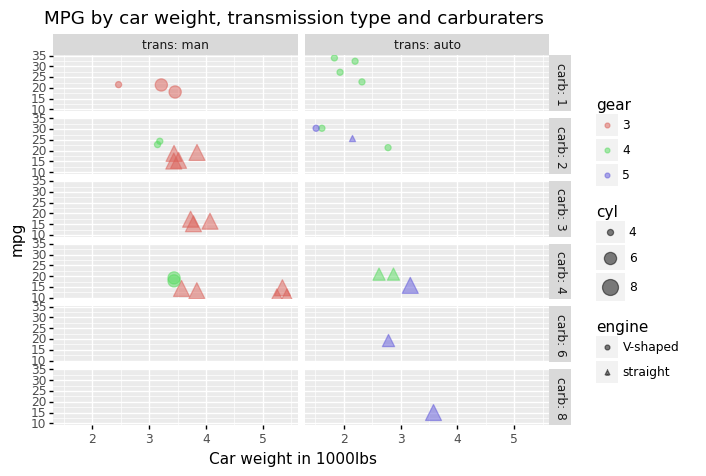

<ggplot: (8736198334160)>

In [40]:
(ggplot(df, aes(x='wt', y='mpg', color='gear', size='cyl', shape='engine'))
 +geom_jitter(alpha=0.5) 
 +facet_grid('carb~trans', labeller=label_both)
  + labs(x="Car weight in 1000lbs", title='MPG by car weight, transmission type and carburaters'))